In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Transaction analysis

In [2]:
transaction = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',  sheet_name='Transactions', header=1)
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [3]:
# percentage of missing data
transaction.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

In [50]:
transaction.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [4]:
# descriptive analysis of numeric attributes
transaction.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [5]:
transaction[transaction.transaction_id.duplicated()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


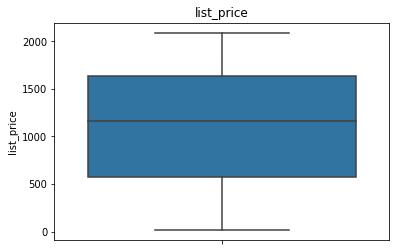

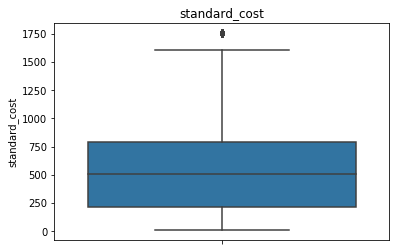

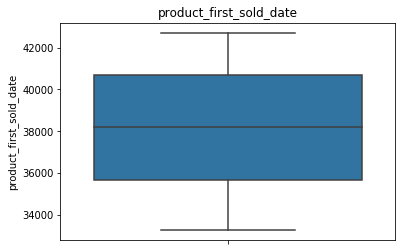

In [6]:
# boxplot of numeric attributes
num_var = ['list_price', 'standard_cost', 'product_first_sold_date']

def num_boxplot(list, df):
    for var in list:
        sns.boxplot(y=df[var])
        plt.title(var)
        plt.show()
        
num_boxplot(num_var, transaction)

We have one outlier in standard_cost column

In [7]:
# let's investigate in standard_cost column
pd.options.display.max_columns = None
transaction.standard_cost.quantile(np.arange(0.1,1.01,0.01))

0.10      99.59
0.11     101.58
0.12     108.76
0.13     125.07
0.14     131.92
         ...   
0.96    1516.13
0.97    1531.42
0.98    1580.47
0.99    1610.90
1.00    1759.85
Name: standard_cost, Length: 91, dtype: float64

In [8]:
# list of customer id having standard cost = 1759.85
list = transaction[transaction.standard_cost == 1759.85]['customer_id'].to_list()
list

[3473,
 2135,
 3380,
 720,
 1535,
 2383,
 1147,
 1060,
 860,
 2572,
 2796,
 2548,
 2618,
 1103,
 3477,
 1911,
 2567,
 482,
 341,
 1051,
 1438,
 778,
 3042,
 637,
 1331,
 802,
 1449,
 1052,
 2339,
 234,
 893,
 1587,
 2666,
 375,
 735,
 292,
 638,
 3151,
 2114,
 2404,
 525,
 2690,
 2392,
 1690,
 1597,
 710,
 1119,
 1581,
 810,
 172,
 1069,
 2945,
 309,
 3483,
 3071,
 962,
 1038,
 2509,
 134,
 1522,
 1506,
 1623,
 343,
 3015,
 2983,
 601,
 2088,
 1876,
 884,
 1876,
 829,
 334,
 742,
 1324,
 2762,
 1982,
 136,
 1119,
 498,
 1237,
 565,
 2921,
 140,
 776,
 3074,
 3426,
 1635,
 38,
 3066,
 2063,
 1913,
 718,
 2376,
 1048,
 484,
 34,
 2237,
 1177,
 576,
 1334,
 1575,
 217,
 2913,
 1129,
 2609,
 2344,
 1889,
 1076,
 1918,
 1598,
 286,
 640,
 684,
 2185,
 2144,
 2537,
 2885,
 3266,
 1500,
 2916,
 2561,
 3187,
 1512,
 2562,
 823,
 2698,
 2182,
 3203,
 3113,
 1302,
 3411,
 714,
 142,
 1482,
 2529,
 382,
 2788,
 2615,
 1129,
 1052,
 3252,
 844,
 2751,
 1374,
 884,
 260,
 443,
 906,
 2525,
 1290,
 

In [55]:
pd.DataFrame(list).to_csv('ls_custId.csv')

In [9]:
cat_var = [var for var in transaction.columns if transaction[var].dtypes == 'object']

def cardinality(list, df):
    for var in list:
        print(var,'cardinality ->', df[var].nunique())
        print(df[var].unique(),'\n')
        
cardinality(cat_var, transaction)

order_status cardinality -> 2
['Approved' 'Cancelled'] 

brand cardinality -> 6
['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan] 

product_line cardinality -> 4
['Standard' 'Road' 'Mountain' 'Touring' nan] 

product_class cardinality -> 3
['medium' 'low' 'high' nan] 

product_size cardinality -> 3
['medium' 'large' 'small' nan] 



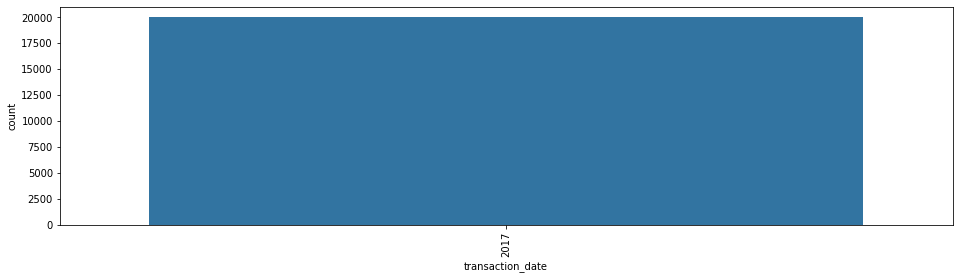

In [10]:
#plt.figure(figsize=(16,4))
#transaction['transaction_date'].hist(bins=30)

def year_analyz(df, var):
    plt.figure(figsize=(16,4))
    sns.countplot(pd.DatetimeIndex(df[var]).year)
    plt.xticks(rotation = 90)
    plt.show()
    
year_analyz(transaction, 'transaction_date')

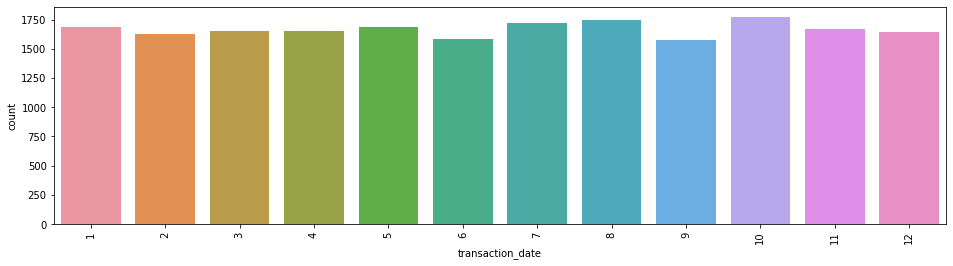

In [53]:
plt.figure(figsize=(16,4))
sns.countplot(pd.DatetimeIndex(transaction['transaction_date']).month)
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'count of online order')

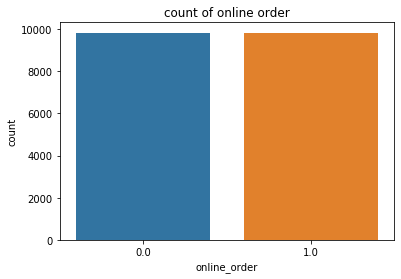

In [11]:
sns.countplot(transaction.online_order)
plt.title('count of online order')

In [10]:
transaction.corr()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
transaction_id,1.000000,-0.011486,0.001753,0.003394,-0.006154,-0.003291,0.004835
product_id,-0.011486,1.000000,0.004278,-0.004233,0.090066,0.038765,-0.052961
customer_id,0.001753,0.004278,1.000000,0.001616,0.009306,0.005365,-0.001521
online_order,0.003394,-0.004233,0.001616,1.000000,-0.000295,0.006934,0.000902
list_price,-0.006154,0.090066,0.009306,-0.000295,1.000000,0.551539,0.059367
standard_cost,-0.003291,0.038765,0.005365,0.006934,0.551539,1.000000,0.031088
product_first_sold_date,0.004835,-0.052961,-0.001521,0.000902,0.059367,0.031088,1.000000


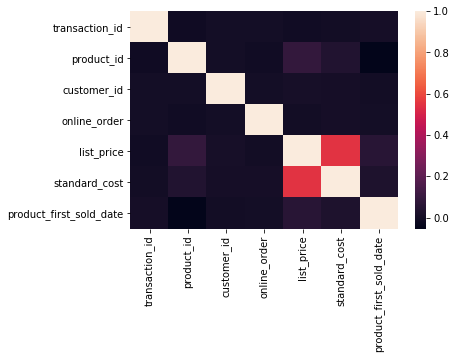

In [13]:
sns.heatmap(transaction.corr())

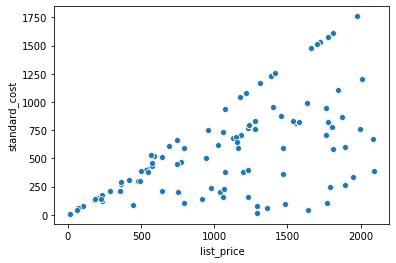

In [56]:
sns.scatterplot(transaction.list_price, transaction.standard_cost)

# New customer list analysis

In [4]:
nw_cust_ls = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',  sheet_name='NewCustomerList', header=1)
nw_cust_ls.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


5 columns are unnamed 

In [5]:
nw_cust_ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

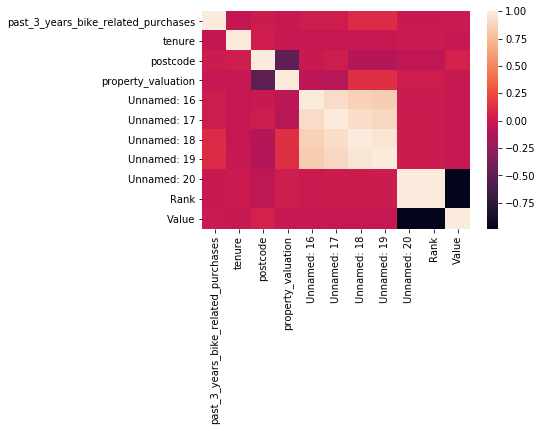

In [15]:
sns.heatmap(nw_cust_ls.corr())

In [16]:
nw_cust_ls.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Unnamed: 16                             0.0
Unnamed: 17                             0.0
Unnamed: 18                             0.0
Unnamed: 19                             0.0
Unnamed: 20                             0.0
Rank                                    0.0
Value                           

In [51]:
nw_cust_ls.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [17]:
nw_cust_ls[nw_cust_ls[['first_name', 'last_name']].duplicated()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value


In [18]:
cat_var = [var for var in nw_cust_ls.columns if nw_cust_ls[var].dtypes == 'object']
cat_var = cat_var[2:]
cat_var

['gender',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'address',
 'state',
 'country']

In [19]:
cardinality(cat_var, nw_cust_ls)

gender cardinality -> 3
['Male' 'Female' 'U'] 

job_title cardinality -> 184
['General Manager' 'Structural Engineer' 'Senior Cost Accountant'
 'Account Representative III' 'Financial Analyst'
 'Assistant Media Planner' 'Compensation Analyst'
 'Human Resources Assistant II' 'Speech Pathologist'
 'Accounting Assistant IV' 'Programmer Analyst I'
 'Environmental Specialist' 'Human Resources Manager' 'VP Marketing'
 'Clinical Specialist' nan 'Associate Professor' 'Actuary'
 'Internal Auditor' 'Programmer I' 'Quality Engineer'
 'Quality Control Specialist' 'Account Executive' 'Engineer II' 'Nurse'
 'Librarian' 'Paralegal' 'Assistant Manager' 'Senior Quality Engineer'
 'Recruiting Manager' 'Design Engineer'
 'Business Systems Development Analyst' 'VP Quality Control'
 'Cost Accountant' 'Product Engineer' 'Social Worker'
 'Payment Adjustment Coordinator' 'Marketing Assistant' 'Recruiter'
 'VP Product Management' 'Media Manager III' 'Developer I'
 'Senior Financial Analyst' 'Electrical Enginee

gender column is having label = 'U

In [20]:
nw_cust_ls.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [21]:
remain_var = [var for var in nw_cust_ls.columns if var not in cat_var + ['first_name', 'last_name']]
num_var = remain_var[2:]
num_var = [var for var in num_var if 'Unnamed:' not in var]
num_var

['tenure', 'postcode', 'property_valuation', 'Rank', 'Value']

In [22]:
nw_cust_ls[num_var].describe()

,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,11.388000,3019.227000,7.397000,498.819000,0.881714
std,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,15.000000,3845.500000,9.000000,750.250000,1.075000
max,22.000000,4879.000000,12.000000,1000.000000,1.718750


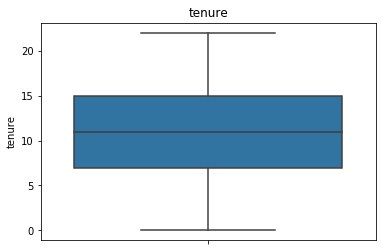

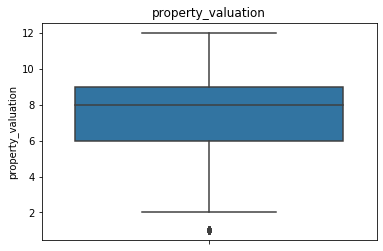

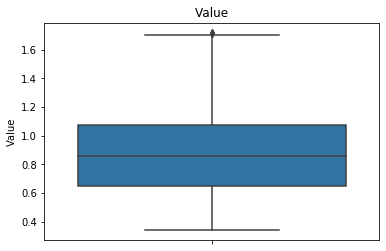

In [23]:
num_boxplot(['tenure', 'property_valuation', 'Value'], nw_cust_ls)

The property_valuation column is having an outlier

In [24]:
# let's investigate into an outlier  
nw_cust_ls.property_valuation.quantile(np.arange(0.05,1.05,0.05))

0.05     2.0
0.10     3.0
0.15     4.0
0.20     5.0
0.25     6.0
0.30     6.0
0.35     7.0
0.40     7.0
0.45     8.0
0.50     8.0
0.55     8.0
0.60     8.0
0.65     9.0
0.70     9.0
0.75     9.0
0.80    10.0
0.85    10.0
0.90    11.0
0.95    11.0
1.00    12.0
Name: property_valuation, dtype: float64

In [25]:
nw_cust_ls[nw_cust_ls.property_valuation < 2]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4,4,1.703125
35,Arleen,Casbolt,Female,48,1975-05-10,Senior Quality Engineer,Financial Services,Affluent Customer,N,Yes,13,41042 Lotheville Crossing,4817,QLD,Australia,1,0.77,0.9625,0.962500,0.962500,36,36,1.447656
46,Sheena,Kybbye,Female,14,1956-07-16,Paralegal,Financial Services,Affluent Customer,N,Yes,19,306 Clemons Junction,4852,QLD,Australia,1,0.91,1.1375,1.137500,1.137500,46,46,1.407812
108,Aridatha,Sephton,Female,95,1961-10-22,Human Resources Assistant II,NaN,Mass Customer,N,No,5,422 Forster Circle,2340,NSW,Australia,1,0.93,0.9300,1.162500,0.988125,104,104,1.287500
126,Rebeca,Aggas,Female,66,1953-02-27,Social Worker,Health,Affluent Customer,N,No,21,7026 Katie Lane,3818,VIC,Australia,1,0.58,0.5800,0.580000,0.580000,127,127,1.250000
127,Ricki,Dobrowski,Male,13,1975-03-10,Civil Engineer,Manufacturing,Mass Customer,N,Yes,9,8 Eggendart Pass,2835,NSW,Australia,1,0.89,1.1125,1.112500,0.945625,127,127,1.250000
128,Georgetta,Lovett,Female,42,1940-02-02,Editor,Retail,Mass Customer,N,No,12,1 Bluejay Place,4405,QLD,Australia,1,0.70,0.7000,0.700000,0.595000,127,127,1.250000
144,Glenn,Casbourne,Female,4,1981-08-08,Senior Editor,Manufacturing,Mass Customer,N,No,6,2 Morrow Alley,4207,QLD,Australia,1,0.90,0.9000,0.900000,0.765000,144,144,1.234375
173,Paten,Cayet,Male,56,1995-02-19,Assistant Manager,Manufacturing,Affluent Customer,N,Yes,16,1398 Burning Wood Way,3850,VIC,Australia,1,1.00,1.2500,1.250000,1.250000,174,174,1.168750
203,Rosemonde,Cartwight,Female,44,1952-10-20,Analyst Programmer,Retail,Mass Customer,N,Yes,7,518 Paget Hill,4605,QLD,Australia,1,1.00,1.2500,1.250000,1.062500,202,202,1.140625


In [26]:
nw_cust_ls[nw_cust_ls.property_valuation < 2].shape[0]/len(nw_cust_ls)*100

3.0

In [27]:
# Customer first and last name having property_valuation < 2
list_pv = nw_cust_ls[nw_cust_ls.property_valuation < 2][['first_name', 'last_name']]
list_pv

,first_name,last_name
3,Lucine,Stutt
35,Arleen,Casbolt
46,Sheena,Kybbye
108,Aridatha,Sephton
126,Rebeca,Aggas
127,Ricki,Dobrowski
128,Georgetta,Lovett
144,Glenn,Casbourne
173,Paten,Cayet
203,Rosemonde,Cartwight


In [58]:
list_pv.to_csv('first_last.csv')

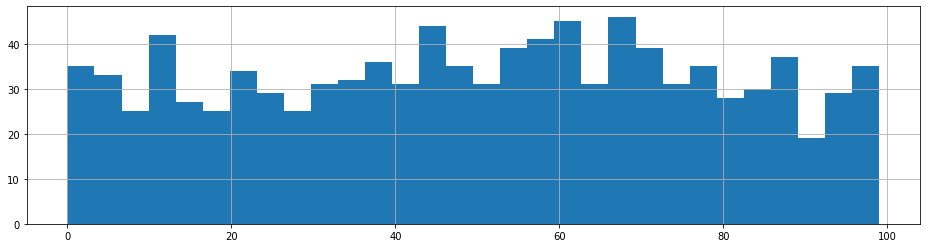

In [28]:
plt.figure(figsize=(16,4))
nw_cust_ls.past_3_years_bike_related_purchases.hist(bins=30)

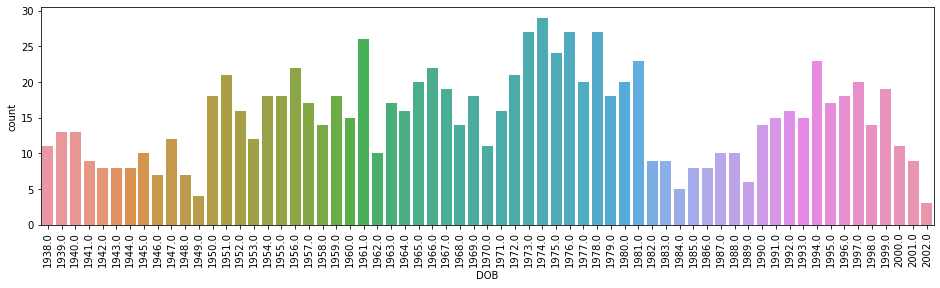

In [29]:
year_analyz(nw_cust_ls, 'DOB')

# Customers Demographics analysis

In [6]:
Cust_dmgrp = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',  sheet_name='CustomerDemographic', header=1)
Cust_dmgrp.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [7]:
Cust_dmgrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

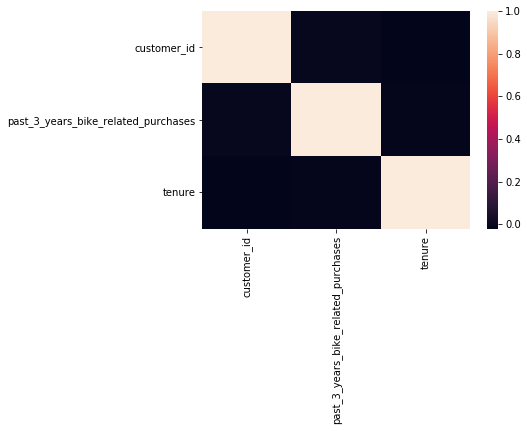

In [31]:
sns.heatmap(Cust_dmgrp.corr())

In [32]:
Cust_dmgrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

Un recognizable column default

In [33]:
Cust_dmgrp.isnull().mean()*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
default                                 7.550
owns_car                                0.000
tenure                                  2.175
dtype: float64

In [52]:
Cust_dmgrp.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [34]:
Cust_dmgrp[Cust_dmgrp['customer_id'].duplicated()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure


In [35]:
cat_var = [var for var in Cust_dmgrp.columns if var not in num_var + ['first_name', 'last_name']]
cat_var

['customer_id',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'default',
 'owns_car']

In [36]:
cardinality(cat_var, Cust_dmgrp)

customer_id cardinality -> 4000
[   1    2    3 ... 3998 3999 4000] 

gender cardinality -> 6
['F' 'Male' 'Female' 'U' 'Femal' 'M'] 

past_3_years_bike_related_purchases cardinality -> 100
[93 81 61 33 56 35  6 31 97 49 99 58 38 85 91 57 79 76 72 74 43 55 12 37
  5 62 18  3 17 44 59 40 46 64 24 63 98 51 68 22  2 48 87 26 60 47 73 21
 67 16 78 30 94 28 20 11  1 75 41 69 19 80 83 25 54  4 23 65 88 10 77  9
 82 27 53 32 34 71 36 90 95  8 39  7 42 13 45 50 14 89 84 96 70 66  0 15
 86 92 29 52] 

DOB cardinality -> 3448
['1953-10-12T00:00:00.000000000' '1980-12-16T00:00:00.000000000'
 '1954-01-20T00:00:00.000000000' ... '1975-12-12T00:00:00.000000000'
 '2001-07-13T00:00:00.000000000' '1991-11-05T00:00:00.000000000'] 

job_title cardinality -> 195
['Executive Secretary' 'Administrative Officer' 'Recruiting Manager' nan
 'Senior Editor' 'Media Manager I' 'Business Systems Development Analyst'
 'Senior Quality Engineer' 'Nuclear Power Engineer' 'Developer I'
 'Account Executive' 'Junior Execut

* different labels for same category in gender column

In [37]:
num_var =[var for var in Cust_dmgrp.columns if Cust_dmgrp[var].dtypes != 'object']
num_var

['customer_id', 'past_3_years_bike_related_purchases', 'DOB', 'tenure']

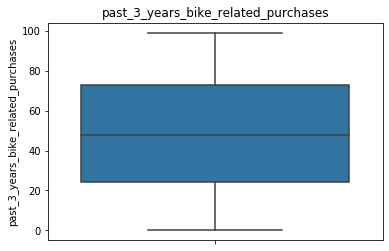

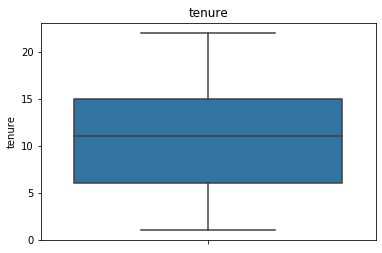

In [38]:
num_boxplot(['past_3_years_bike_related_purchases', 'tenure'], Cust_dmgrp)

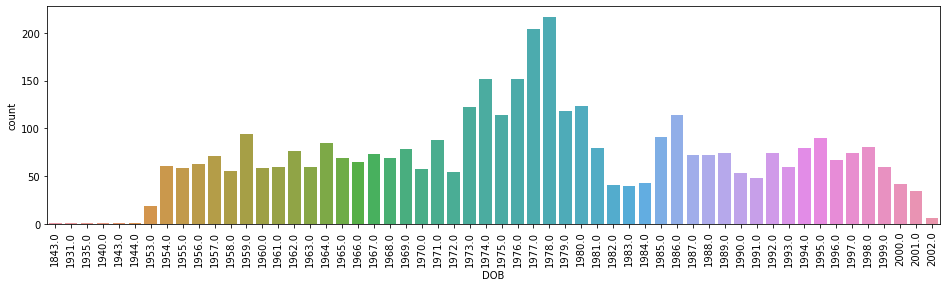

In [39]:
year_analyz(Cust_dmgrp, 'DOB')

One outlier in DOB column ie year 1843

In [40]:
# Customer information having Date of birth in year 1834
Cust_dmgrp.iloc[33,:]

customer_id                                             34
first_name                                        Jephthah
last_name                                         Bachmann
gender                                                   U
past_3_years_bike_related_purchases                     59
DOB                                    1843-12-21 00:00:00
job_title                                  Legal Assistant
job_industry_category                                   IT
wealth_segment                           Affluent Customer
deceased_indicator                                       N
default                                                NaN
owns_car                                                No
tenure                                                  20
Name: 33, dtype: object

# Customer's Address

In [8]:
address = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',  sheet_name='CustomerAddress', header=1)
address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [9]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [43]:
address.isnull().mean()*100

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

In [44]:
address[address['customer_id'].duplicated()]

,customer_id,address,postcode,state,country,property_valuation


In [45]:
address.duplicated().sum()

0

In [46]:
cardinality(['state', 'country'], address)

state cardinality -> 5
['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria'] 

country cardinality -> 1
['Australia'] 



The state column is having different labels for same categories

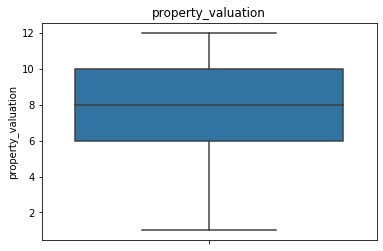

In [47]:
num_boxplot(['property_valuation'], address)

In [48]:
address['postcode'].describe()

count    3999.000000
mean     2985.755939
std       844.878364
min      2000.000000
25%      2200.000000
50%      2768.000000
75%      3750.000000
max      4883.000000
Name: postcode, dtype: float64

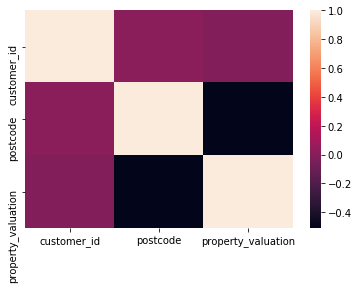

In [49]:
sns.heatmap(address.corr())